# Sun Angles

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Calculates the diurnal cycle for a given longitude, latitude and day of year.

In [3]:
import ephem
from datetime import datetime, timedelta

In [4]:
site = ephem.Observer()

# INPUT THE LONGITUDE AND LATITUDE MANUALLY
#
#   From rrtm_sw_instructions
#
#	 REF_LAT     latitude of location of calculation (degrees)
#		     defaults for REF_LAT = 0:
#		     a) MODEL 0,2,3,6    REF_LAT = 45.0 degrees 
#		     b) MODEL 1          REF_LAT = 15.0
#		     c) MODEL 4,5        REF_LAT = 60.0
#	   
# Model 0 = User supplied atmosphere
# Model 1 = Tropical
# Model 2 = Midlatitude Summer
# Model 3 = Midlatitude Winter
# Model 4 = Sub-Arctic Summer
# Model 5 = Sub-Arctic Winter
# Model 6 = US standard atmosphere

site.lon, site.lat = '0.0', '60.0'

In [5]:
# USE THE CURRENT DAY
#utc = datetime.utcnow()

# INPUT THE DAY MANUALLY
utc = datetime(2015,3,21)

site.date = utc.strftime('%Y/%m/%d')
utcday    = datetime(utc.year, utc.month, utc.day)

In [6]:
# time resolution (in minutes)
tres = 10

sun  = ephem.Sun()
sun.compute(site)
time = array([])
alt  = array([])
azi  = array([])
for hour in arange(0,24*60,tres)/60:       
    time = append(time,utcday + timedelta(hours=hour))
    alt  = append(alt,sun.alt)
    azi  = append(azi,sun.az)
    
    site.date = time[-1]
    sun.compute(site)


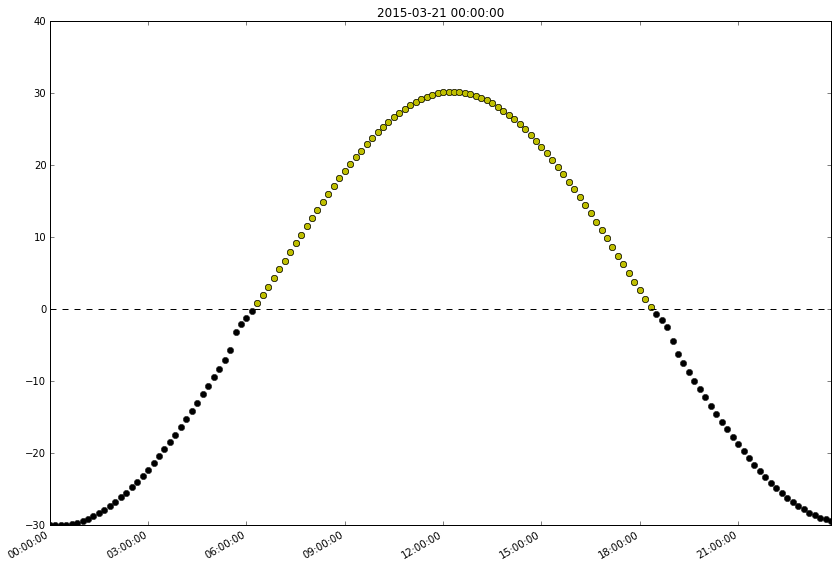

In [7]:
figure(figsize=(14,10))
# All points in black.
plot_date(time,alt*180./pi,'ko')

# Daytime points in yellow.
day = alt>0.
plot_date(time[day],alt[day]*180./pi,'yo')
title(str(utcday))

# Improve formatting.
axhline(0,color='k',linestyle='--')
gcf().autofmt_xdate()

In [8]:
ind = find(day>0.)
daylength = float(len(ind))/float(len(time)) * 24.
print('Approximate length of day is:', daylength, 'hours')

Approximate length of day is: 12.166666666666666 hours


In [9]:
print('Minimum Solar Zenith Angle (maximum elevation angle) is: %f5.1 degrees' % (90. - max(alt)*180/pi))

Minimum Solar Zenith Angle (maximum elevation angle) is: 59.7564005.1 degrees


<i>© Von P. Walden, Washington State University</i>